Hola **Andrés**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>

</div>

# Análisis de Métricas y Recomendaciones de Marketing

## Importación de librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Carga de Datos Reales

In [2]:
df_visits = pd.read_csv('/datasets/visits_log_us.csv')
df_orders = pd.read_csv('/datasets/orders_log_us.csv')
df_costs = pd.read_csv('/datasets/costs_us.csv')

In [3]:
print("Visitas")
display(df_visits.head())
print("Ordenes")
display(df_orders.head())
print("Costos")
display(df_costs.head())

Visitas


,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


Ordenes


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


Costos


,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


### conversión de tipo de datos

In [4]:
# visitas
df_visits['End Ts'] = pd.to_datetime(df_visits['End Ts'])
df_visits['Start Ts'] = pd.to_datetime(df_visits['Start Ts'])

# ordenes
df_orders['Buy Ts'] = pd.to_datetime(df_orders['Buy Ts'])

# costos
df_costs['dt'] = pd.to_datetime(df_costs['dt'])

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Bun trabajo con el análisis inicial y el ajuste de los datos en tus dataset, siempre es importante primero garantizar la calidad de los datos antes de pasar a cualquier proceso
</div>

## Análisis y Métricas

### Visitas


 1. **Usuarios únicos:** Cantidad de usuarios únicos que visitan el sitio cada día, semana y mes.

In [5]:
# Usuarios únicos por día
df_visits['date'] = df_visits['Start Ts'].dt.date
daily_users = df_visits.groupby('date')['Uid'].nunique()

display(daily_users.head())

date
2017-06-01    605
2017-06-02    608
2017-06-03    445
2017-06-04    476
2017-06-05    820
Name: Uid, dtype: int64

In [6]:
# Usuarios únicos semanales
df_visits['week'] = df_visits['Start Ts'].dt.to_period('W').apply(lambda r: r.start_time.date())
weekly_users = df_visits.groupby('week')['Uid'].nunique()
display(weekly_users.head())

week
2017-05-29    2021
2017-06-05    4129
2017-06-12    2812
2017-06-19    2878
2017-06-26    3064
Name: Uid, dtype: int64

In [7]:
# Usuarios únicos mensuales
df_visits['month'] = df_visits['Start Ts'].dt.to_period('M').astype(str)
monthly_users = df_visits.groupby('month')['Uid'].nunique()
display(monthly_users.head())

month
2017-06    13259
2017-07    14183
2017-08    11631
2017-09    18975
2017-10    29692
Name: Uid, dtype: int64

2. **Sesiones diarias:** Número total de sesiones por mes.

In [8]:
# Número de sesiones por mes
daily_sessions = df_visits.groupby('month')['Uid'].count()
display(daily_sessions.head())

month
2017-06    16505
2017-07    17828
2017-08    14355
2017-09    23907
2017-10    37903
Name: Uid, dtype: int64

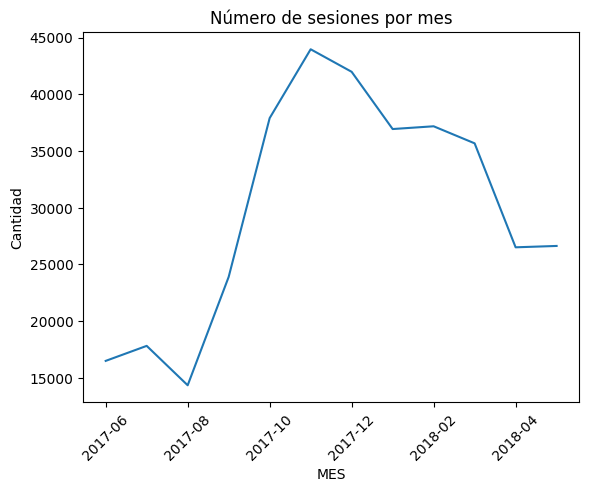

In [30]:
daily_sessions.plot(
legend=False,
title='Número de sesiones por mes',
xlabel='MES',
ylabel='Cantidad',
rot=45)

plt.show()

Muestra que el número de sesiones aumentó significativamente desde junio hasta octubre de 2017, alcanzando su punto máximo en noviembre, y luego comenzó a descender gradualmente hasta estabilizarse en abril de 2018. Esto puede indicar una temporada de alta actividad seguida por una caída en el interés o la retención de usuarios.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Mostrar solo los primeros resultados del cálculo no es lo correcto para el análisis ya que puede sesgar el mismo, aquí deberías mostrar una gráfica para analizar los resultados diarios, mensuales y semanales
</div>

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
tienes mucha razón, voy a agregar el grafico
</div>

3. **Duración de cada sesión:** Diferencia entre Start Ts y End Ts (en minutos).

In [10]:
# Calcular la duración de la sesión en minutos
df_visits['session_duration'] = (df_visits['End Ts'] - df_visits['Start Ts']).dt.total_seconds() / 60

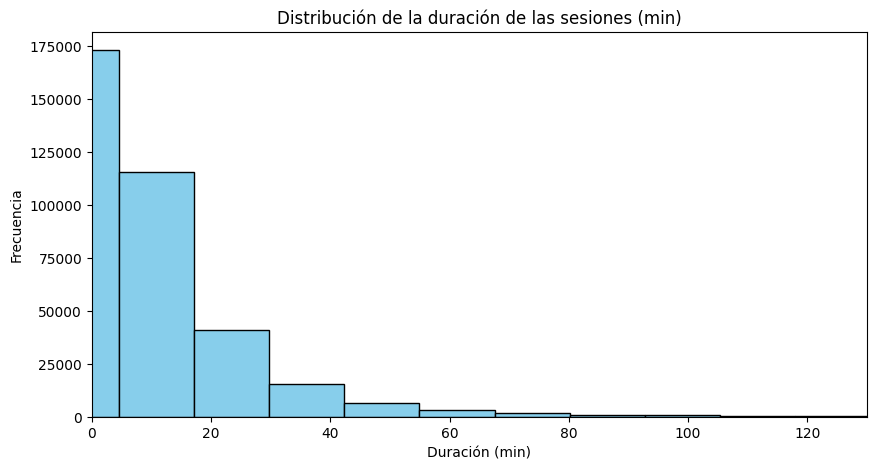

In [11]:
# Distribución de la duración de las sesiones
plt.figure(figsize=(10, 5))
plt.hist(df_visits['session_duration'], bins=60, color='skyblue', edgecolor='black')

plt.xlim(0, 130)

plt.title('Distribución de la duración de las sesiones (min)')
plt.xlabel('Duración (min)')
plt.ylabel('Frecuencia')
plt.show()

Muestra que la mayoría de las sesiones tienen una duración corta, especialmente entre 0 y 10 minutos, con una frecuencia que disminuye rápidamente a medida que aumenta el tiempo. Esto indica que los usuarios tienden a abandonar pronto la sesión, y solo una pequeña parte permanece más de 30 minutos.

4. **Frecuencia de retorno:** Tiempo transcurrido entre sesiones consecutivas para cada usuario.

In [12]:
# Calcular la frecuencia de retorno para cada usuario
df_visits_sorted = df_visits.sort_values(by=['Uid', 'Start Ts'])

# Obtener la fecha de la visita anterior para cada usuario
df_visits_sorted['prev_visit'] = df_visits_sorted.groupby('Uid')['Start Ts'].shift(1)

# Calcular los días desde la última visita
df_visits_sorted['days_since_last'] = (df_visits_sorted['Start Ts'] - df_visits_sorted['prev_visit']).dt.days

# Mostrar las primeras filas con la frecuencia de retorno
display(df_visits_sorted[['Uid', 'Start Ts', 'prev_visit', 'days_since_last']].head())


,Uid,Start Ts,prev_visit,days_since_last
196543,11863502262781,2018-03-01 17:27:00,NaT,NaN
257333,49537067089222,2018-02-06 15:55:00,NaT,NaN
173818,297729379853735,2017-06-07 18:47:00,NaT,NaN
173142,313578113262317,2017-09-18 22:49:00,NaT,NaN
192554,313578113262317,2018-02-18 15:17:00,2017-09-18 22:49:00,152.0


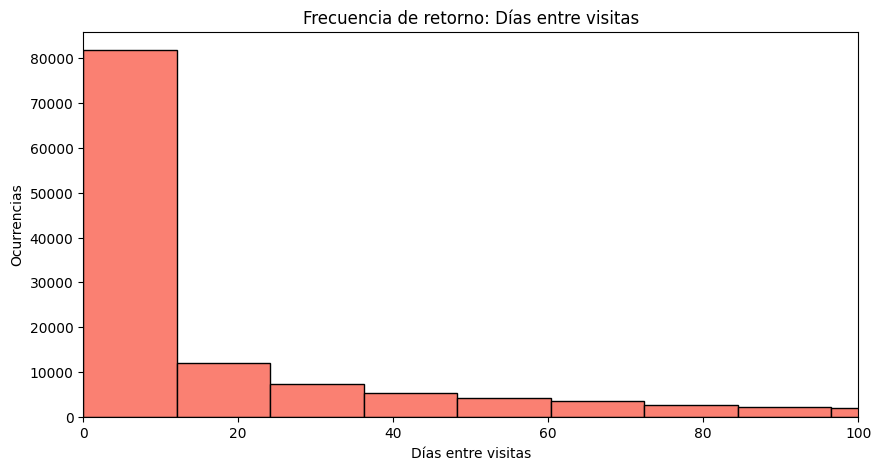

In [13]:
# Histograma de días entre visitas (sin valores nulos)
plt.figure(figsize=(10, 5))
plt.hist(df_visits_sorted['days_since_last'].dropna(), bins=30, color='salmon', edgecolor='black')

plt.xlim(0, 100)

plt.title('Frecuencia de retorno: Días entre visitas')
plt.xlabel('Días entre visitas')
plt.ylabel('Ocurrencias')
plt.show()

la mayoría de los usuarios regresan en un corto periodo de tiempo tras su última visita, especialmente dentro de los primeros 10 días. A medida que aumentan los días entre visitas, la frecuencia de retorno disminuye drásticamente, lo que sugiere que el compromiso tiende a ser más fuerte poco después de una visita inicial.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Esta parte está muy bien! Pero recuerda que cuando se muestren gráficas estas deben venir acompañadas de la redacción de la interpretación de la misma, así es más claro el proceso de análisis en el notebook
</div>

### Ventas

1. **Tiempo hasta la conversión:** Diferencia entre la primera visita y el primer pedido para cada usuario

In [14]:
# Obtener la primera visita de cada usuario
first_visit = df_visits.groupby('Uid')['Start Ts'].min().reset_index().rename(columns={'Start Ts': 'first_visit'})

# Obtener el primer pedido de cada usuario
first_order = df_orders.groupby('Uid')['Buy Ts'].min().reset_index().rename(columns={'Buy Ts': 'first_order'})

# Unir ambas tablas por usuario
conversion = pd.merge(first_visit, first_order, on='Uid', how='inner')

# Calcular meses hasta la conversión
conversion['conversion_months'] = (
    (conversion['first_order'].dt.year - conversion['first_visit'].dt.year) * 12 +
    (conversion['first_order'].dt.month - conversion['first_visit'].dt.month)
)

# Mostrar primeros resultados
print("Tiempo hasta la conversión (meses) para algunos usuarios:")
display(conversion[['Uid', 'first_visit', 'first_order', 'conversion_months']].head())


Tiempo hasta la conversión (meses) para algunos usuarios:


,Uid,first_visit,first_order,conversion_months
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,4
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,0
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,0
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0


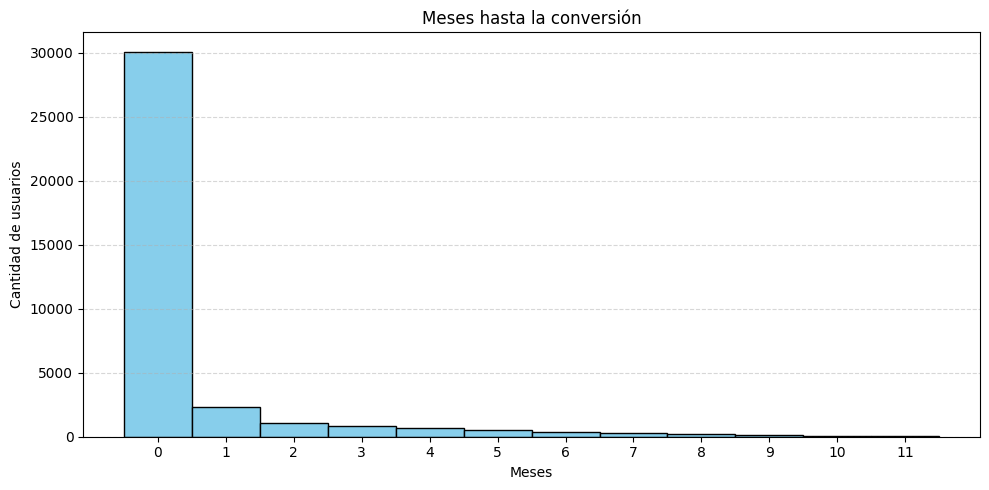

In [15]:
# Crear histograma
plt.figure(figsize=(10, 5))
plt.hist(conversion['conversion_months'], bins=range(0, conversion['conversion_months'].max() + 2), color='skyblue', edgecolor='black', align='left')
plt.xticks(range(0, 12))  # Mostrar todos los meses desde 0 al 12
plt.title('Meses hasta la conversión')
plt.xlabel('Meses')
plt.ylabel('Cantidad de usuarios')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

La mayoría de los usuarios que convierten lo hacen en el mismo mes en que realizaron su primera visita (mes 0). A partir de ahí, la conversión cae abruptamente, y solo una pequeña fracción convierte en los meses siguientes. Esto indica que las decisiones de conversión suelen ser rápidas y que el interés disminuye con el tiempo.

2. y 3. **Cantidad de pedidos y tamaño promedio de compra:** Se agrupan los pedidos por día y se calcula la media del ingreso para evaluar el tamaño de compra.

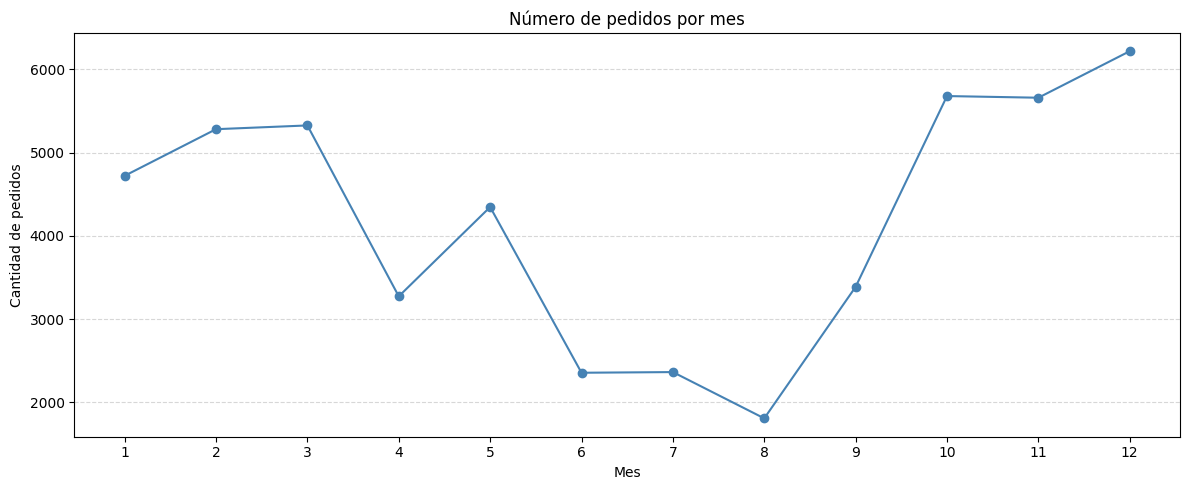

In [16]:
# Extraer el mes de cada pedido
df_orders['order_month'] = df_orders['Buy Ts'].dt.month

# Agrupar por mes y contar pedidos
orders_per_month = df_orders.groupby('order_month').size()

# Crear gráfico
plt.figure(figsize=(12, 5))
orders_per_month.plot(kind='line', marker='o', color='steelblue')
plt.title('Número de pedidos por mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de pedidos')
plt.xticks(range(1, 13))  # Mostrar del 1 al 12
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


El gráfico muestra una estacionalidad clara en los pedidos: hay caídas notables en los meses 4, 6, 7 y especialmente en el 8, seguidas por un aumento sostenido desde septiembre hasta diciembre, con un pico en el último mes del año. Esto sugiere que los pedidos tienden a aumentar en la temporada final del año, probablemente por campañas de fin de año o comportamiento estacional del consumidor.

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Mismo caso que el anterior, siempre procura redactar la interpretación de las gráficas
</div>

In [17]:
# Tamaño promedio de compra
average_order_value = df_orders['Revenue'].mean()
print(f"Tamaño promedio de compra: ${average_order_value:.2f}")

Tamaño promedio de compra: $5.00


4. **Lifetime Value (LTV):** Suma total de ingresos generados por usuario.

In [31]:
df_orders.head()

,Buy Ts,Revenue,Uid,order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,6
1,2017-06-01 00:25:00,0.55,11627257723692907447,6
2,2017-06-01 00:27:00,0.37,17903680561304213844,6
3,2017-06-01 00:29:00,0.55,16109239769442553005,6
4,2017-06-01 07:58:00,0.37,14200605875248379450,6


In [35]:
# Lifetime Value (LTV) por mes
ltv_per_month = df_orders.groupby('order_month')['Revenue'].sum()
print("Ejemplo de LTV por usuario:")
display(ltv_per_user)

Ejemplo de LTV por usuario:


order_month
1     19417.13
2     25560.54
3     28834.59
4     16858.06
5     20735.98
6      9560.91
7     12539.47
8      8758.78
9     18345.51
10    27987.70
11    27069.93
12    36388.60
Name: Revenue, dtype: float64

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Calcularlo de manera tan granular cómo por ID puede que no sea tan claro de analizar a menos que sea un caso muy específico, te recomendaría aquí calcularlo por cohort y mostrar el LTV de cada cohort
</div>


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>

lo voy a organizar por mes la cohorte que elegí     
</div>

### Marketing

1. **Gasto total en publicidad:** Tanto global como segmentado por source_id.

In [19]:
# Gasto total en marketing
total_cost = df_costs['costs'].sum()
print(f"Gasto total en publicidad: ${total_cost:.2f}")

Gasto total en publicidad: $329131.62


In [20]:
# se crea columna por mes
df_costs['month'] = df_costs['dt'].dt.month

# Gasto total en marketing por mes
cost_month = df_costs.groupby(['month', 'source_id']).sum('costs').reset_index()
cost_month.head()

,month,source_id,costs
0,1,1,2186.18
1,1,2,4157.74
2,1,3,14808.78
3,1,4,5832.79
4,1,5,5371.52


2. **Costo de adquisición de clientes (CAC):** Gasto dividido entre el número de usuarios convertidos, usando la fuente de adquisición que aparece en la primera visita.

In [21]:
# Gasto por fuente
cost_by_source = df_costs.groupby('source_id')['costs'].sum()
print("Gasto por fuente de adquisición:")
display(cost_by_source)

Gasto por fuente de adquisición:


source_id
1      20833.27
2      42806.04
3     141321.63
4      61073.60
5      51757.10
9       5517.49
10      5822.49
Name: costs, dtype: float64

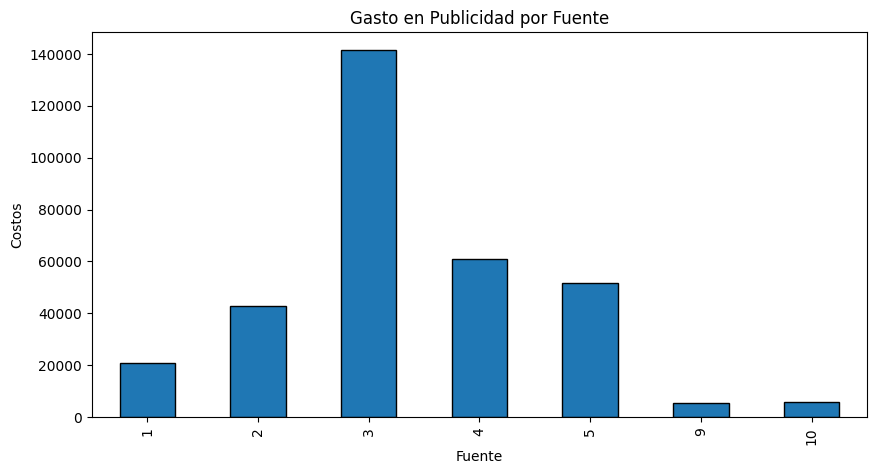

In [22]:
# Graficar gasto por fuente (barras)
plt.figure(figsize=(10,5))
cost_by_source.plot(kind='bar', edgecolor='black')
plt.title('Gasto en Publicidad por Fuente')
plt.xlabel('Fuente')
plt.ylabel('Costos')
plt.show()

3. **Rentabilidad (ROMI):** Cálculo del retorno de la inversión basado en los ingresos generados por fuente y el gasto asociado.

In [23]:
# Suponemos que la fuente de adquisición de cada usuario es la de su primer registro
user_source = df_visits.sort_values(by='Start Ts').groupby('Uid').first().reset_index()[['Uid', 'Source Id']]


# Unir la información de conversión con la fuente
conversion_with_source = pd.merge(conversion, user_source, on='Uid', how='left')

# Número de clientes adquiridos por fuente
customers_by_source = conversion_with_source.groupby('Source Id')['Uid'].nunique()
print("Clientes adquiridos por fuente:")
display(customers_by_source)

Clientes adquiridos por fuente:


Source Id
1      2899
2      3506
3     10473
4     10296
5      6931
7         1
9      1088
10     1329
Name: Uid, dtype: int64

In [24]:
### Cálculo del Costo de Adquisición de Clientes (CAC)
# Calcular el CAC: gasto de la fuente / número de clientes adquiridos
cac = cost_by_source / customers_by_source
print("Costo de Adquisición de Clientes (CAC) por fuente:")
display(cac)

Costo de Adquisición de Clientes (CAC) por fuente:


1      7.186364
2     12.209367
3     13.493901
4      5.931779
5      7.467479
7           NaN
9      5.071222
10     4.381106
dtype: float64

In [25]:
### Cálculo del ROMI

# Asociar órdenes con la fuente de adquisición (utilizando la fuente del primer registro)
orders_with_source = pd.merge(df_orders, user_source, on='Uid', how='left')
orders_with_source.head()

,Buy Ts,Revenue,Uid,order_month,Source Id
0,2017-06-01 00:10:00,17.00,10329302124590727494,6,1
1,2017-06-01 00:25:00,0.55,11627257723692907447,6,2
2,2017-06-01 00:27:00,0.37,17903680561304213844,6,2
3,2017-06-01 00:29:00,0.55,16109239769442553005,6,2
4,2017-06-01 07:58:00,0.37,14200605875248379450,6,3


In [26]:
# Ingresos por fuente
revenue_by_source = orders_with_source.groupby('Source Id')['Revenue'].sum()
revenue_by_source.head()

Source Id
1    31090.55
2    46923.61
3    54511.24
4    56696.83
5    52624.02
Name: Revenue, dtype: float64

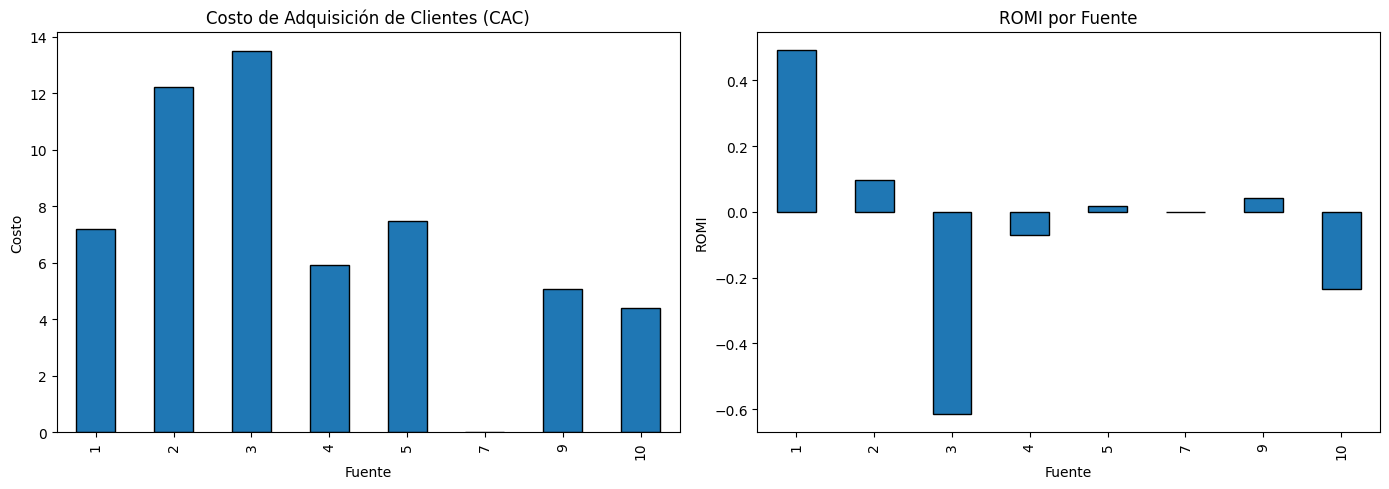

In [40]:
# Calcular ROMI: (ingresos - gasto) / gasto
romi = (revenue_by_source - cost_by_source) / cost_by_source

# Graficar CAC y ROMI
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

cac.plot(kind='bar', ax=ax[0], edgecolor='black')
ax[0].set_title('Costo de Adquisición de Clientes (CAC)')
ax[0].set_xlabel('Fuente')
ax[0].set_ylabel('Costo')

romi.plot(kind='bar', ax=ax[1], edgecolor='black')
ax[1].set_title('ROMI por Fuente')
ax[1].set_xlabel('Fuente')
ax[1].set_ylabel('ROMI')

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-danger">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Aquí tienes un error debido al nombre incorrecto de la columna
</div>


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>

olvidé subir una parte    
    
</div>

## Conclusiones y Recomendaciones de Marketing

**Conclusiones generales:**

1. Duración de sesiones:

- La mayoría de las sesiones tienen una duración relativamente corta (menos de 30 minutos)
- Hay una gran concentración de sesiones muy breves, lo que podría indicar un alto porcentaje de rebote


2. Frecuencia de retorno:

- La mayor frecuencia de retorno se concentra en los primeros días, indicando que cuando los usuarios vuelven, tienden a -hacerlo en un periodo corto
- Existe una larga cola de usuarios que retornan después de periodos más extensos


3. Tiempo hasta la conversión:

- La mayoría de las conversiones ocurren en el mes 0, lo que sugiere que los usuarios que compran tienden a hacerlo durante su primera visita
- Las conversiones disminuyen significativamente después del primer mes


4. Pedidos por mes:

- Se observa una tendencia creciente en el número de pedidos mensuales
- Hay variabilidad mensual que podría corresponder a estacionalidad


5. Gasto en publicidad por fuente:

- La fuente 3 tiene el mayor gasto en publicidad por un margen considerable
- Las fuentes 4 y 5 también tienen gastos significativos


6. CAC y ROMI:

- CAC:

    - La fuente 3 tiene uno de los CAC más altos
    - Las fuentes 9 y 10 tienen los CAC más bajos, lo que las hace más eficientes


- ROMI:

    - La fuente 1 tiene el mejor ROMI (aproximadamente 0.49)
    - La fuente 3 tiene un ROMI muy negativo (-0.61), lo que indica que es la menos rentable a pesar de tener la mayor inversión
    - Las fuentes 2, 5 y 9 tienen ROMI positivos pero bajos
    - Las fuentes 4 y 10 también tienen ROMI negativos





**Recomendaciones basadas en los datos:**

- el presupuesto de marketing: Reducir significativamente la inversión en la fuente 3 (ROMI muy negativo) y aumentar inversión en las fuentes con mejor rendimiento (1, 2, 5 y 9).
- Mejorar la experiencia de usuario: El alto número de sesiones muy cortas sugiere problemas potenciales con la retención inicial de usuarios.
- Optimizar el proceso de conversión: La mayoría de las conversiones ocurren inmediatamente o nunca, lo que indica oportunidades para mejorar las estrategias de remarketing y nurturing.
- Investigar la fuente 1: Tiene el mejor ROMI, pero no el mayor volumen de usuarios. Entender qué hace exitosa esta fuente podría ayudar a mejorar otras campañas.